#Linear Programming

#Problem 1
 Given the system of inequalities below, determine the shape of the feasible region and find the vertices of the feasible region. Give the shape as "triangle", "quadrilateral", or "unbounded". Report your vertices starting with the one which has the smallest 𝑥
-value. If more than one vertex has the same, smallest 𝑥
-value, start with the one that has the smallest 𝑦
-value. Proceed clockwise from the first vertex. Leave any unnecessary answer spaces blank.
<br>The objective function is: $'P=3x+y2'$
<br>$x+y\geq5$
<br>$9x+y\geq8$
<br>$x\geq0$
<br>$y\geq0$

**Answer**
Let's start off with graphing the system first.

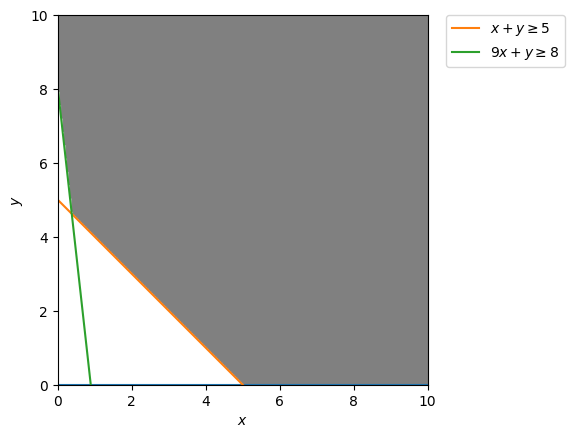

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
d = np.linspace(-2,10,300)
x,y = np.meshgrid(d,d)
plt.imshow( ((y>=0) & (x>=0) & (y>=5-x) & (y>=8-9*x).astype(int)) ,
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.5);


x = np.linspace(-2, 10, 300)
y1 = (x*0) + 0
y2 = (5-x)
y3 = (8-9*x)

# Make plot
plt.plot(x, y1)
plt.plot(x, y2, label=r'$x+y\geq5$')
plt.plot(x, y3, label=r'$9x+y\geq8$')
plt.xlim(0,10)
plt.ylim(0,10)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.show()

I'll use SciPy package linprog to make my life easier. Though it only handles minimizations, we can have it minimize the negative of what we try to maximinze :)

In [ ]:
from scipy.optimize import linprog
obj = [-3,-2]

lhs_ineq = [[1, 1],
            [9,1]]
rhs_ineq = [[5],
           [8]]
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, method="revised simplex")

opt

<ipython-input-4-a55affca6979>:8: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, method="revised simplex")


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -10.375
       x: [ 3.750e-01  4.625e+00]
     nit: 2

In [ ]:
#Find all the corner points

A = np.array([[1,1], [9,1], [1,0], [0,1]])
b = np.array([[5], [8], [0], [0]])

print(np.linalg.solve(A[0:2,:],b[0:2]))
print(np.linalg.solve(A[1:3,:],b[1:3]))
print(np.linalg.solve([A[0,:], A[3,:]],[b[0], b[3]]))



[[0.375]
 [4.625]]
[[0.]
 [8.]]
[[5.]
 [0.]]


Looks pretty good. For slack variable, I'll build a seperate function and perform later for both question.

#Problem 2
A company manufactures two models of snowboards, standard and deluxe. Each deluxe model requires 28 hours to produce, and 84 units of material. Each standard model requires 14 hours to produce and 70 units of material. The company has 924 production hours available and 3388 units of material in stock. The deluxe model sells for $\$252$ and the standard model sells for $1\$80$.


**Answer**<br>
Firsly, let analyze the question.
There are two components, standard and deluxe models. Let's name them $x_1$ and $x_2$ accordingly. What we try to maximize here is the revenue, which consists the sale of standard models which go for $\$252$, and deluxe models which go for $\$180$. Therefore we have:
<br>$P=252x_1+180x_2$<br>
For producing hours, standard models take $28$ hours and deluxe models take $14$, and it cannot exceed $924$ hours. Therefore, we have our contraint:
<br>$28x_1+14x_2\leq924$<br>
For units of material, standard models take $84$ units and deluxe models take $70$ units, and it cannot exceed $3388$ units. Therefore, we have our contraint:
<br>$84x_1+70x_2\leq3388$<br>
Since we are talking about hours and units of material, both $x_1$ and $x_2$ cannot be negative.
Finally, we have:
<br>$P=252x_1+180x_2$
<br>$28x_1+14x_2\leq924$
<br>$84x_1+70x_2\leq3388$
<br>$x_1\geq0$
<br>$x_2\geq0$
<br><br>
**Let's actually graph them first before we find corner points**

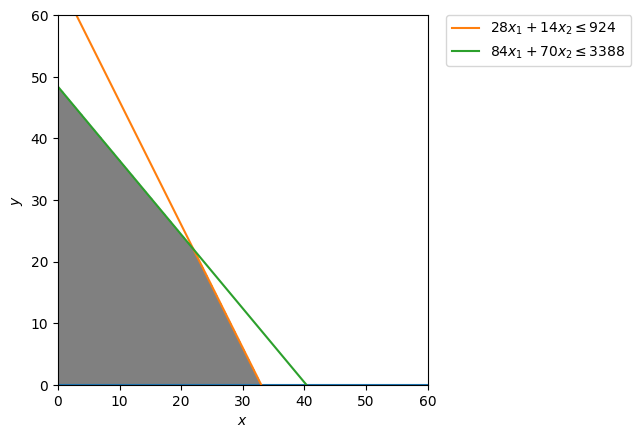

In [ ]:
import matplotlib.pyplot as plt
d = np.linspace(-2,60,300)
x,y = np.meshgrid(d,d)
plt.imshow( ((y>=0) & (x>=0) & (14*y<=924-28*x) & (70*y<=-84*x+3388).astype(int)) ,
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.5);


x = np.linspace(-2, 60, 300)
y1 = (x*0) + 0
y2 = (924-28*x)/14.00
y3 = (-84*x+3388)/70.00

# Make plot
plt.plot(x, y1)
plt.plot(x, y2, label=r'$28x_1+14x_2\leq924$')
plt.plot(x, y3, label=r'$84x_1+70x_2\leq3388$')
plt.xlim(0,60)
plt.ylim(0,60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

Now let's actually find the corner points.

In [ ]:
from scipy.optimize import linprog
obj = [-252,-180]

lhs_ineq = [[28, 14],
            [84,70]]
rhs_ineq = [[924],
           [3388]]
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, method="revised simplex")

opt



<ipython-input-190-ac18771f2207>:8: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, method="revised simplex")


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -9504.0
       x: [ 2.200e+01  2.200e+01]
     nit: 2

In [ ]:
#Find all the corner points

A = np.array([[28,14], [84,70], [1,0], [0,1]])
b = np.array([[924], [3388], [0], [0]])

print(np.linalg.solve(A[0:2,:],b[0:2]))
print(np.linalg.solve(A[1:3,:],b[1:3]))
print(np.linalg.solve([A[0,:], A[3,:]],[b[0], b[3]]))

[[22.]
 [22.]]
[[ 0. ]
 [48.4]]
[[33.]
 [ 0.]]


As we can see that in the object, x is the corner point, which matches what is on the graph. Next we will introduce slack var and build the whole system from the ground up, which is great because we can test both question.

#With Slack Variable Problem 2

In [ ]:
import numpy as np
np.set_printoptions(suppress=True,precision=3)

A =np.array([[28,14,1,0,0,924],
             [84,70,0,1,0,3388],
             [-252,-180,0,0,1,0]], dtype = float)

def changingLeading(matrix, targetRow, pivotRow, pivotCol):
  pivotValue = matrix[targetRow, pivotCol]
  for i in range(len(matrix[targetRow,:])):
    matrix[targetRow,i] = matrix[pivotRow, i]*(-pivotValue) + matrix[targetRow,i]

def rowOperation(matrix):
  #pivotRow = A[-1,:].where(x==min(A[-1,:]))[0][0]
  #finding pivot row and cols
  pivotCol = np.where(matrix[-1,:]==(min(matrix[-1,:])))[0][0]
  pivotRow = 0 if matrix[0,-1]/matrix[0,pivotCol] < matrix[1,-1]/matrix[1,pivotCol] else 1

  #perform row operation to make pivot row value 1
  matrix[pivotRow,:] = matrix[pivotRow,:]/matrix[pivotRow,pivotCol]

  #perform row operation to make non-pivot row value 0
  changingLeading(matrix, -1, pivotRow, pivotCol)
  changingLeading(matrix, abs(pivotRow-1), pivotRow, pivotCol)

def LP(matrix):
  while sum(number < 0 for number in matrix[-1,:]) > 0:
    rowOperation(matrix)

LP(A)
A


array([[   1.   ,    0.   ,    0.089,   -0.018,    0.   ,   22.   ],
       [   0.   ,    1.   ,   -0.107,    0.036,    0.   ,   22.   ],
       [   0.   ,    0.   ,    3.214,    1.929,    1.   , 9504.   ]])

#With Slack Variable Problem 1

In [ ]:
B = np.array([[1,1,1,0,0,5],
             [9,1,0,1,0,8],
             [-3,-2,0,0,1,0]], dtype = float)
LP(B)
B

array([[ 0.   ,  1.   ,  1.125, -0.125,  0.   ,  4.625],
       [ 1.   ,  0.   , -0.125,  0.125,  0.   ,  0.375],
       [ 0.   ,  0.   ,  1.875,  0.125,  1.   , 10.375]])